## Dates and Times

A special type of categorical variable are those that instead of taking traditional labels, like color (blue, red), or city (London, Manchester), take dates as values. For example, date of birth ('29-08-1987', '12-01-2012'), or time of application ('2016-Dec', '2013-March').

Datetime variables can contain dates only, or time only, or date and time.

Typically, we would never work with a date variable as a categorical variable, for a variety of reasons:

- Date variables usually contain a huge number of individual categories, which will expand the feature space dramatically
- Date variables allow us to capture much more information from the dataset if preprocessed in the right way

In addition, often, date variables will contain dates that were not present in the dataset that we used to train the machine learning algorithm. In fact, will contain dates placed in the future respect to the dates present in the dataset we used to train. Therefore, the machine learning model will not know what to do with them, because it never saw them while being trained. 

**I will cover different types of pre-processing/engineering date variables in the section "Engineering date variables".**

=============================================================================


## Real Life example: Peer to peer lending (Finance)

### Lending Club

**Lending Club** is a peer-to-peer Lending company based in the US. They match people looking to invest money with people looking to borrow money. When investors invest their money through Lending Club, this money is passed onto borrowers, and when borrowers pay their loans back, the capital plus the interest passes on back to the investors. It is a win for everybody as they can get typically lower loan rates and higher investor returns.

If you want to learn more about Lending Club follow this [link](https://www.lendingclub.com/).

The Lending Club dataset contains complete loan data for all loans issued through 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Features include credit scores, number of finance inquiries, address including zip codes and state, and collections among others. Collections indicates whether the customer has missed one or more payments and the team is trying to recover their money.

The file is a matrix of about 890 thousand observations and 75 variables. More detail on this dataset can be found in [Kaggle's website](https://www.kaggle.com/wendykan/lending-club-loan-data)

Let's go ahead and have a look at the variables!

====================================================================================================

To download the Lending Club loan book from Kaggle go to this [website](https://www.kaggle.com/wendykan/lending-club-loan-data)

Scroll down to the bottom of the page, and click on the link 'loan.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset.
Unzip it, and save it to a directory of your choice.

**Note that you need to be logged in to Kaggle in order to download the datasets**.

If you save it in the same directory from which you are running this notebook, then you can load it the same way I will load it below.

====================================================================================================

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load the Lending Club dataset with a few selected columns

use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

data = pd.read_csv('loan.csv', usecols=use_cols)

data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
0,2500,C,Dec-18,debt_consolidation,Feb-19
1,30000,D,Dec-18,debt_consolidation,Feb-19
2,5000,D,Dec-18,debt_consolidation,Feb-19
3,4000,D,Dec-18,debt_consolidation,Feb-19
4,30000,C,Dec-18,debt_consolidation,Feb-19


In [4]:
# let's inspect at the pandas type of object used to store the information

data.dtypes, data.shape

(loan_amnt        int64
 grade           object
 issue_d         object
 purpose         object
 last_pymnt_d    object
 dtype: object, (1048575, 5))

In [16]:
# now let's parse the dates, currently coded as strings, into datetime format
# this will allow us to make some analysis afterwards

data['issue_dt'] = pd.to_datetime(data.issue_d, format='%b-%y')
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d, errors='coerce', format='%b-%y')

data[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-18,2018-12-01,Feb-19,2019-02-01
1,Dec-18,2018-12-01,Feb-19,2019-02-01
2,Dec-18,2018-12-01,Feb-19,2019-02-01
3,Dec-18,2018-12-01,Feb-19,2019-02-01
4,Dec-18,2018-12-01,Feb-19,2019-02-01


In [28]:
data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum()

issue_dt    grade
2015-10-01  A         98847925
            B        157492625
            C        155293775
            D         82040875
            E         49807050
            F         13743250
            G          3027675
2015-11-01  A         96877225
            B        159012975
            C        166885150
            D         78934850
            E         49738050
            F         13179950
            G          2569125
2015-12-01  A        111858650
            B        182194000
            C        191813650
            D        101166925
            E         59556350
            F         17824425
            G          3496550
2016-01-01  A         95759575
            B        147332350
            C        140597350
            D         68702300
            E         45947075
            F         16410300
            G          3654450
2016-02-01  A        104884925
            B        183327175
                       ...    
2018-08-01  F        

In [33]:
data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().reset_index().head()

,issue_dt,grade,loan_amnt
0,2015-10-01,A,98847925
1,2015-10-01,B,157492625
2,2015-10-01,C,155293775
3,2015-10-01,D,82040875
4,2015-10-01,E,49807050


In [34]:
data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().unstack().head()

grade,A,B,C,D,E,F,G
issue_dt,,,,,,,
2015-10-01,98847925,157492625,155293775,82040875,49807050,13743250,3027675
2015-11-01,96877225,159012975,166885150,78934850,49738050,13179950,2569125
2015-12-01,111858650,182194000,191813650,101166925,59556350,17824425,3496550
2016-01-01,95759575,147332350,140597350,68702300,45947075,16410300,3654450
2016-02-01,104884925,183327175,178256025,78405100,49975575,19532500,5064950


Text(0, 0.5, 'Disbursed Amount (US Dollars)')

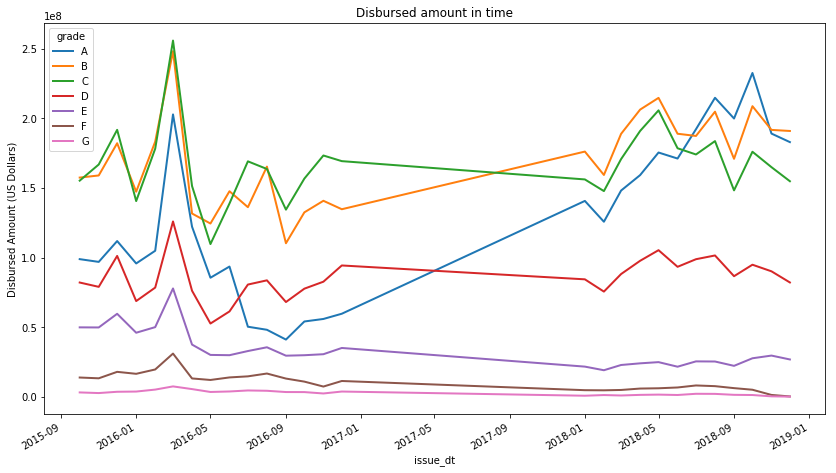

In [31]:
# let's see how much money Lending Club has disbursed
# (i.e., lent) over the years to the different risk
# markets (grade variable)

fig = data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount (US Dollars)')

Lending Club seems to have increased the amount of money lent from 2013 onwards. The tendency indicates that they continue to grow. In addition, we can see that their major business comes from lending money to C and B grades.

'A' grades are the lower risk borrowers, this is borrowers that most likely will be able to repay their loans, as they are typically in a better financial situation. Borrowers within this grade are typically charged lower interest rates.

E, F and G grades represent the riskier borrowers. Usually borrowers in somewhat tighter financial situations, or for whom there is not sufficient financial history to make a reliable credit assessment. They are typically charged higher rates, as the business, and therefore the investors, take a higher risk when lending them money.

Lending Club lends the biggest fraction to borrowers that intend to use that money to repay other debt or credit cards.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**